# Importing all the required libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [44]:
train = pd.read_csv('titanic_train.csv')

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

Creating a simple heatmap to see where we are missing data!

In [46]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

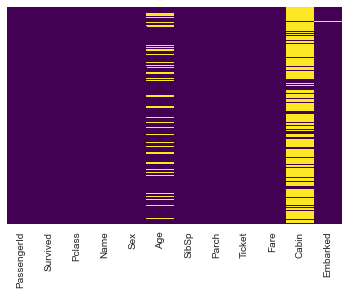

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<AxesSubplot:xlabel='Survived', ylabel='count'>

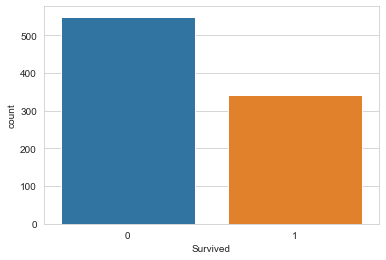

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

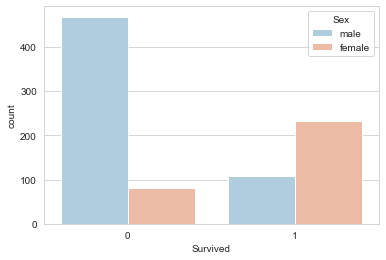

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

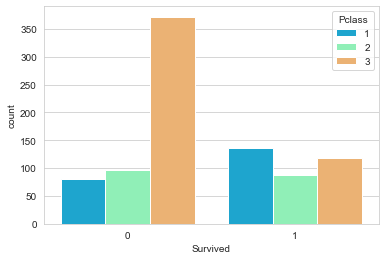

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:xlabel='Age'>

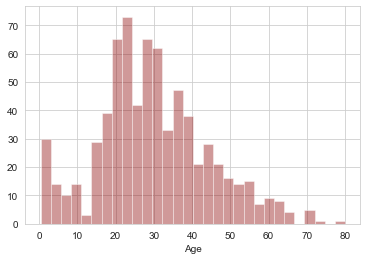

In [51]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

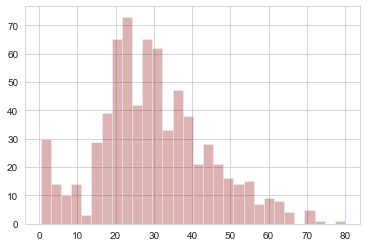

In [52]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

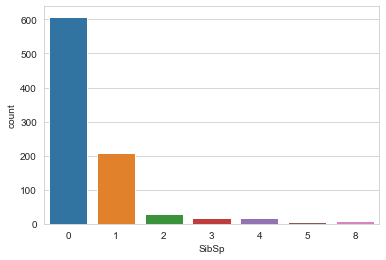

In [53]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

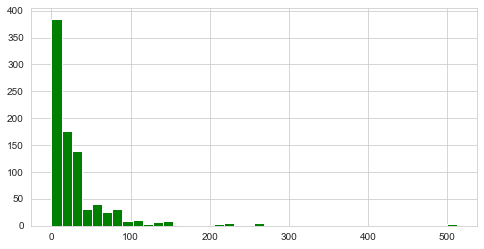

In [54]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [55]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [56]:
import cufflinks as cf
cf.go_offline()

In [57]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

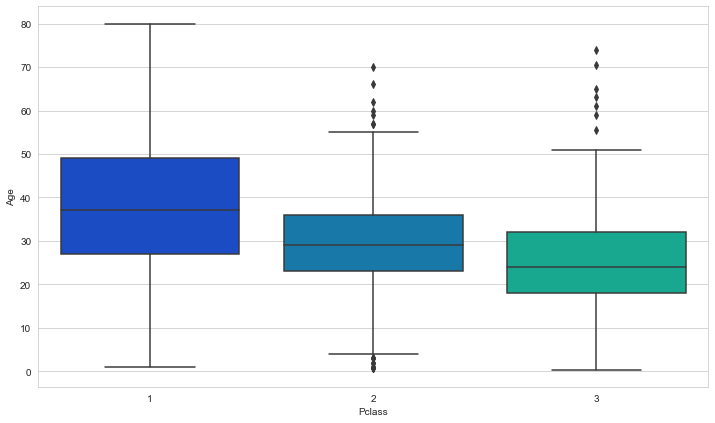

In [58]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [59]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [60]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

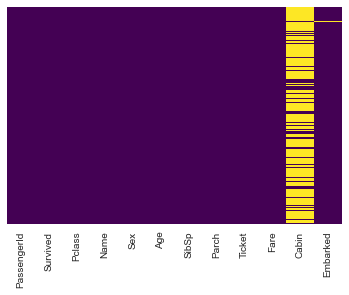

In [61]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [62]:
train.drop('Cabin',axis=1,inplace=True)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [64]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [67]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [71]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [68]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [69]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [72]:
train = pd.concat([train,sex,embark],axis=1)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [77]:
pip install pycaret

  Using cached pycaret-2.3.0-py3-none-any.whl (261 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

imbalanced-learn 0.8.0 requires scikit-learn>=0.24, but you'll have scikit-learn 0.23.2 which is incompatible.


  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
  Using cached pandas_profiling-2.11.0-py2.py3-none-any.whl (243 kB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached lightgbm-3.1.1-py2.py3-none-win_amd64.whl (754 kB)
Processing c:\users\pjadhav2\appdata\local\pip\cache\wheels\78\90\b9\f91c4696d71b99c5d1ac4265acb20eb9dd16828993470cfdd8\pyod-0.8.7-py3-none-any.whl
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached mlflow-1.14.1-py3-none-any.whl (14.2 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
Processing c:\users\pjadhav2\appdata\local\pip\cache\wheels\2a\5b\b3\26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670\pyldavis-3.2.2-py2.py3-none-any.whl
  Using cached spacy-2.3.5-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
Processing c:\users\pjadha

In [78]:
from pycaret.classification import *

In [79]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [81]:
clf=setup(train,target='S',silent=True,session_id=786)

,Description,Value
0,session_id,786
1,Target,S
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(889, 10)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [82]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8569,0.9078,0.9535,0.8656,0.9065,0.6017,0.6241,0.0290
lightgbm,Light Gradient Boosting Machine,0.8569,0.8919,0.9403,0.8738,0.9055,0.6119,0.6214,0.0200
dt,Decision Tree Classifier,0.8425,0.8082,0.8829,0.9007,0.8908,0.6063,0.6104,0.0070
ada,Ada Boost Classifier,0.8280,0.8713,0.9249,0.8528,0.8866,0.5295,0.5432,0.0280
ridge,Ridge Classifier,0.8216,0.0000,0.9823,0.8131,0.8895,0.4467,0.5015,0.0070
rf,Random Forest Classifier,0.8200,0.8597,0.9250,0.8436,0.8820,0.5042,0.5176,0.0710
lr,Logistic Regression,0.8184,0.8046,0.9735,0.8144,0.8867,0.4463,0.4952,0.4820
lda,Linear Discriminant Analysis,0.8152,0.8037,0.9735,0.8118,0.8850,0.4326,0.4821,0.0080
et,Extra Trees Classifier,0.7959,0.8242,0.9051,0.8316,0.8661,0.4375,0.4478,0.0640
knn,K Neighbors Classifier,0.6896,0.6027,0.8740,0.7444,0.8038,0.0810,0.0877,0.0100


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=786, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# So applying pycaret on the data we able to know that gradient boosting classifier is the best model that can be used in this Titanic dataset.

In [84]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [93]:
X=train.iloc[:,0:9]
y=train[['S']]

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from  sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [123]:
#Applying stratified 5cross validation
skf = StratifiedKFold(n_splits=5)
estimators=[1000,1500,2000]
rate=[0.5,0.7,0.9]
for x in estimators: 
    model = GradientBoostingClassifier(n_estimators=x, learning_rate=0.9,
     max_depth=1, random_state=0) 
    score=cross_val_score(model, X_train,y_train, cv=5)
    print('When the n_estimatore is {} the score is {}'.format(x,np.mean(score)))

When the n_estimatore is 1000 the score is 0.8579336156800945
When the n_estimatore is 1500 the score is 0.8635378705801241
When the n_estimatore is 2000 the score is 0.863547719885748


So as the value of iterations increases the accuracy is increasing

# Evaluation

In [125]:
model = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.9,
     max_depth=1, random_state=0) 
model1=model.fit(X_train,y_train)
y_pred=model1.predict(X_test)


In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8932584269662921

In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        46
           1       0.93      0.92      0.93       132

    accuracy                           0.89       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.89      0.89      0.89       178

